# Quesitons

Q1-a : 
    Computational/Time Complexity: 
    The first loop do the n iterations, in each itération, we will travel our entire training dataset which have m instance, for each instance, we have d multiplications which is the length of our element. 
    so we can say that the time complexity is the multiplication of the 3 previous named variable. 
    And therefor, we will get an o(n  m  d)

Q1-b : 
    Space Complexity: we will take the variable that take most space in memory which is our weight w with d as dimension. 
    So the space complexity will be o(d+1)

# Installing Packages 

In [3]:
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install sklearn
!pip install pandas==1.1.5

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


# Implementation

In [4]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Perceptron algorithme 

In [21]:
def perceptron(s,y):
    w = np.zeros((1,2))
    placeholder = np.zeros((1,2))
    for t in range(2000):
        for X,Y in zip(s,y) :
            if  Y * np.inner(X,w) <= 0 : 
                placeholder = w
                w = w + Y * X 
        if (w == placeholder).all() :
            return w
    if t == 999 :
        print("No convergence")
    return w

# Experiement 1 

Q1 : The Points generated have a low variance so they are linearly seperable wich makes the algorithm converges 

Q2 : The decision boundary depends on the initial weights of the perceptron and the data points, 
    so having a small change in these values impacts heavily the decision boundary.

Q3 : The  accuracy is 0.98 on the test set, the decision boundry is plotted on the cells below.

In [24]:
mu = [-1,0]
sigma = [[0.25,0], [0,0.25]]
s1 = np.random.multivariate_normal(mu,sigma,125)

mu = [1,0]
sigma = [[0.25,0], [0,0.25]]
s2 = np.random.multivariate_normal(mu,sigma,125)
s = np.concatenate((s1,s2),axis=0)

In [25]:
y = [-1] * 125 
y.extend([1] * 125)

In [26]:
len(y),len(s)

(250, 250)

In [27]:
s,y= shuffle(s,y)

In [28]:
s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)

In [29]:
w = perceptron(s_train,y_train)

In [30]:
y_pred = np.inner(s_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.98

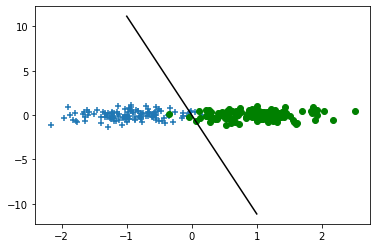

In [31]:
from matplotlib import pyplot as plt

plt.scatter(s1[:,0],s1[:,1], marker='+')
plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')

# Experiment 2

Q1 : The data points have relatively high variance which makes the algorithme confused and unable to converge.

Q2 : Like the previous experiment the decision boundry isn't unique since it's dependant from the weights and the datapoints.


Q3 : The accuracy on the test set is  0.84

In [32]:
mu = [-1,0]
sigma = [[0.75,0], [0,0.75]]
s1 = np.random.multivariate_normal(mu,sigma,125)

mu = [1,0]
sigma = [[0.75,0], [0,0.75]]
s2 = np.random.multivariate_normal(mu,sigma,125)
s = np.concatenate((s1,s2),axis=0)

y = [-1] * 125 
y.extend([1] * 125)

s,y= shuffle(s,y)

s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)

In [33]:
w = perceptron(s_train,y_train)

In [34]:
y_pred = np.inner(s_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.84

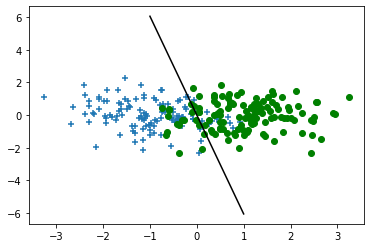

In [35]:
from matplotlib import pyplot as plt

plt.scatter(s1[:,0],s1[:,1], marker='+')
plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')

# Experiment 3

In [37]:
def generate_data(sig):
    mu = [-1,0]
    sigma = [[sig,0], [0,sig]]
    s1 = np.random.multivariate_normal(mu,sigma,125)

    mu = [1,0]
    sigma = [[sig,0], [0,sig]]
    s2 = np.random.multivariate_normal(mu,sigma,125)
    s = np.concatenate((s1,s2),axis=0)
    
    y = [-1] * 125 
    y.extend([1] * 125)

    s,y= shuffle(s,y)
    
    return s1,s2,s,y

In [38]:
def get_accuracy(s_test,y_test,w):
    y_pred = np.inner(s_test,w) 
    for i,pred in enumerate(y_pred) :
        if pred > 0 :
            y_pred[i] = 1
        else :
            y_pred[i] = -1
    return accuracy_score(y_test,y_pred)

[1.0, 1.0, 1.0]
Sigma = 0.01, Mean = 1.0
Sigma = 0.01, Variance = 0.0


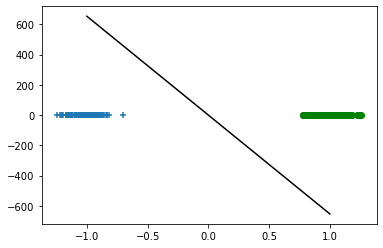

[1.0, 1.0, 1.0]
Sigma = 0.1, Mean = 1.0
Sigma = 0.1, Variance = 0.0


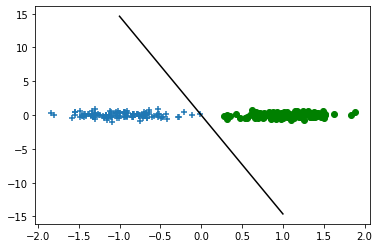

[0.96, 0.88, 0.92]
Sigma = 0.5, Mean = 0.9199999999999999
Sigma = 0.5, Variance = 0.032659863237109024


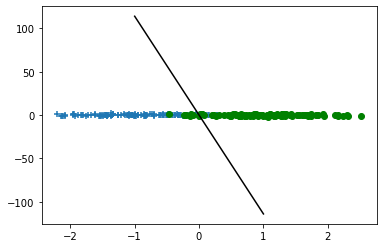

[0.86, 0.88, 0.9]
Sigma = 0.7, Mean = 0.88
Sigma = 0.7, Variance = 0.016329931618554536


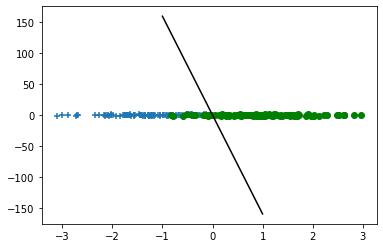

In [41]:
sigs = [0.01,0.1,0.5,0.7]
accuracies_mean = []
accuracies_variance = []
for sig in sigs :
    accuracies = []
    for i in range(3) :
        s1,s2,s,y = generate_data(sig)
        s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)
        w = perceptron(s_train,y_train)
        accuracies.append(get_accuracy(s_test,y_test,w))
    print(accuracies)
    print("Sigma = {}, Mean = {}".format(sig,np.mean(accuracies)))
    print("Sigma = {}, Variance = {}".format(sig,np.std(accuracies)))
    accuracies_mean.append(1-np.mean(accuracies))
    accuracies_variance.append(np.std(accuracies))
    plt.scatter(s1[:,0],s1[:,1], marker='+')
    plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


    a = -w[0][0] / w[0][1]
    xx = np.linspace(-1, 1)
    yy = a * xx / w[0][1]

    plt.plot(xx, yy, 'k-')
    plt.show()

<ErrorbarContainer object of 3 artists>

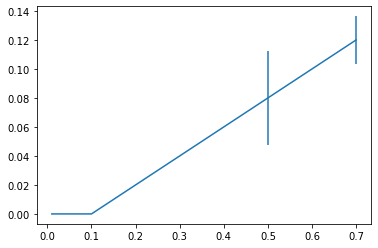

In [42]:
plt.errorbar(x=sigs,y=accuracies_mean,yerr=accuracies_variance) 

Conclusion : 
As we can visually perceive in the errorbar figure above,  as we increment the variation of the distribution, 
the average error increases aswell as it's variance which makes sense since if we increment the variation the datapoints will no longer be linearly separable which we can optically discern in the different plot above : 
The left datapoints are getting more proximate to the right one making finding a linear decision boundry a very arduous task this incrementing the error especially for values of sigma higher then 0.25.